# Link prediction with Node2Vec

In [ ]:
!pip install stellargraph

     |████████████████████████████████| 440kB 29.6MB/s 


In [ ]:
!pip install python-Levenshtein

     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149813 sha256=3d8f9db0418cb13f81898c0691b228a13a8a4f5bb8ff5cd5557bbba12299f957
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein


In [26]:
import matplotlib.pyplot as plt
from math import isclose
from sklearn.decomposition import PCA
import os
import networkx as nx
import numpy as np
import pandas as pd
from stellargraph import StellarGraph, datasets
from stellargraph.data import EdgeSplitter
from collections import Counter
import multiprocessing
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
with open ("NCI.txt", "r") as myfile:
    NCI = myfile.readlines()
for i in range(len(NCI)):
    NCI[i] = NCI[i].split()
    
NCI

[['545', '545'],
 ['5239604', '5239521'],
 ['5239604', '5237887'],
 ['5239604', '5237886'],
 ['5239604', '5237885'],
 ['5239604', '5237884'],
 ['5239604', '5237883'],
 ['5239604', '5237882'],
 ['5239604', '5237881'],
 ['5239604', '5237880'],
 ['5239604', '5237879'],
 ['5239604', '5237878'],
 ['5239604', '5237877'],
 ['5239604', '5237876'],
 ['5239604', '5237875'],
 ['5239604', '5237874'],
 ['5239604', '5237873'],
 ['5239604', '5237872'],
 ['5239604', '5237871'],
 ['5239604', '5237870'],
 ['5239604', '5237869'],
 ['5239604', '5237868'],
 ['5239604', '5237867'],
 ['5239604', '5237866'],
 ['5239604', '5237865'],
 ['5239604', '5237864'],
 ['5239604', '5237863'],
 ['5239604', '5237862'],
 ['5239604', '5237861'],
 ['5239604', '5237860'],
 ['5239604', '5237859'],
 ['5239604', '5237858'],
 ['5239604', '5237857'],
 ['5239604', '5237856'],
 ['5239604', '5237855'],
 ['5239604', '5237854'],
 ['5239604', '5237853'],
 ['5239604', '5237852'],
 ['5239604', '5237851'],
 ['5239604', '5237850'],
 ['52396

In [ ]:
data = pd.DataFrame(NCI, columns=['source','target','drop'])

data.drop('drop',axis='columns', inplace=True)
data.dropna()
data

,source,target
0,545,545
1,5239604,5239521
2,5239604,5237887
3,5239604,5237886
4,5239604,5237885
...,...,...
170665,5239592,2698128
170666,5239592,2346798
170667,5239592,2986404
170668,5239592,3247294


In [ ]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

rows_with_NaN

,source,target
89665,1552622,None
93986,None,None
106763,None,None
115862,None,None
130914,2984040,None
130931,3641637,None
132537,5204241,None
143183,3831043,None
149893,2986410,None


In [ ]:
data = data.drop(labels=[89665,93986,106763,115862,130914,130931,132537,143183,149893], axis=0)

In [ ]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

rows_with_NaN

,source,target


In [ ]:
G = StellarGraph(edges=data)

print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 151065, Edges: 170661

 Node types:
  default: [151065]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [170661]
        Weights: all 1 (default)
        Features: none


In [ ]:
edge_splitter_test = EdgeSplitter(G)

graph_test, examples_test, labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global"
)

print(graph_test.info())

** Sampled 17066 positive and 17066 negative edges. **
StellarGraph: Undirected multigraph
 Nodes: 151065, Edges: 153595

 Node types:
  default: [151065]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [153595]
        Weights: all 1 (default)
        Features: none


In [ ]:
edge_splitter_train = EdgeSplitter(graph_test, G)
graph_train, examples, labels = edge_splitter_train.train_test_split(
    p=0.1, method="global"
)
(
    examples_train,
    examples_model_selection,
    labels_train,
    labels_model_selection,
) = train_test_split(examples, labels, train_size=0.75, test_size=0.25)

print(graph_train.info())

** Sampled 15359 positive and 15359 negative edges. **
StellarGraph: Undirected multigraph
 Nodes: 151065, Edges: 138236

 Node types:
  default: [151065]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [138236]
        Weights: all 1 (default)
        Features: none


In [ ]:
pd.DataFrame(
    [
        (
            "Training Set",
            len(examples_train),
            "Train Graph",
            "Test Graph",
            "Train the Link Classifier",
        ),
        (
            "Model Selection",
            len(examples_model_selection),
            "Train Graph",
            "Test Graph",
            "Select the best Link Classifier model",
        ),
        (
            "Test set",
            len(examples_test),
            "Test Graph",
            "Full Graph",
            "Evaluate the best Link Classifier",
        ),
    ],
    columns=("Split", "Number of Examples", "Hidden from", "Picked from", "Use"),
).set_index("Split")

,Number of Examples,Hidden from,Picked from,Use
Split,,,,
Training Set,23038,Train Graph,Test Graph,Train the Link Classifier
Model Selection,7680,Train Graph,Test Graph,Select the best Link Classifier model
Test set,34132,Test Graph,Full Graph,Evaluate the best Link Classifier


In [18]:
p = 1.0
q = 1.0
dimensions = 512
num_walks = 4
walk_length = 10
window_size = 100
num_iter = 1
workers = multiprocessing.cpu_count()

In [ ]:
from stellargraph.data import BiasedRandomWalk
from gensim.models import Word2Vec


def node2vec_embedding(graph, name):
    rw = BiasedRandomWalk(graph)
    walks = rw.run(graph.nodes(), n=num_walks, length=walk_length, p=p, q=q)
    print(f"Number of random walks for '{name}': {len(walks)}")

    model = Word2Vec(
        walks,
        size=dimensions,
        window=window_size,
        min_count=0,
        sg=1,
        workers=workers,
        iter=num_iter,
    )

    def get_embedding(u):
        return model.wv[u]

    return get_embedding

In [19]:
embedding_train = node2vec_embedding(graph_train, "Train Graph")

Number of random walks for 'Train Graph': 604260


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler


# 1. link embeddings
def link_examples_to_features(link_examples, transform_node, binary_operator):
    return [
        binary_operator(transform_node(src), transform_node(dst))
        for src, dst in link_examples
    ]


# 2. training classifier
def train_link_prediction_model(
    link_examples, link_labels, get_embedding, binary_operator
):
    clf = link_prediction_classifier()
    link_features = link_examples_to_features(
        link_examples, get_embedding, binary_operator
    )
    clf.fit(link_features, link_labels)
    return clf


def link_prediction_classifier(max_iter=2000):
    lr_clf = LogisticRegressionCV(Cs=10, cv=10, scoring="roc_auc", max_iter=max_iter)
    return Pipeline(steps=[("sc", StandardScaler()), ("clf", lr_clf)])


# 3. and 4. evaluate classifier
def evaluate_link_prediction_model(
    clf, link_examples_test, link_labels_test, get_embedding, binary_operator
):
    link_features_test = link_examples_to_features(
        link_examples_test, get_embedding, binary_operator
    )
    score = evaluate_roc_auc(clf, link_features_test, link_labels_test)
    return score


def evaluate_roc_auc(clf, link_features, link_labels):
    predicted = clf.predict_proba(link_features)

    # check which class corresponds to positive links
    positive_column = list(clf.classes_).index(1)
    return roc_auc_score(link_labels, predicted[:, positive_column])

In [21]:
def operator_hadamard(u, v):
    return u * v


def operator_l1(u, v):
    return np.abs(u - v)


def operator_l2(u, v):
    return (u - v) ** 2


def operator_avg(u, v):
    return (u + v) / 2.0


def run_link_prediction(binary_operator):
    clf = train_link_prediction_model(
        examples_train, labels_train, embedding_train, binary_operator
    )
    score = evaluate_link_prediction_model(
        clf,
        examples_model_selection,
        labels_model_selection,
        embedding_train,
        binary_operator,
    )

    return {
        "classifier": clf,
        "binary_operator": binary_operator,
        "score": score,
    }


binary_operators = [operator_hadamard, operator_l1, operator_l2, operator_avg]

In [22]:
results = [run_link_prediction(op) for op in binary_operators]
best_result = max(results, key=lambda result: result["score"])

print(f"Best result from '{best_result['binary_operator'].__name__}'")

pd.DataFrame(
    [(result["binary_operator"].__name__, result["score"]) for result in results],
    columns=("name", "ROC AUC score"),
).set_index("name")

Best result from 'operator_l1'


,ROC AUC score
name,
operator_hadamard,0.802545
operator_l1,0.839939
operator_l2,0.830325
operator_avg,0.701984


In [23]:
embedding_test = node2vec_embedding(graph_test, "Test Graph")

Number of random walks for 'Test Graph': 604260


In [24]:
test_score = evaluate_link_prediction_model(
    best_result["classifier"],
    examples_test,
    labels_test,
    embedding_test,
    best_result["binary_operator"],
)
print(
    f"ROC AUC score on test set using '{best_result['binary_operator'].__name__}': {test_score}"
)

ROC AUC score on test set using 'operator_l1': 0.6849379984139722


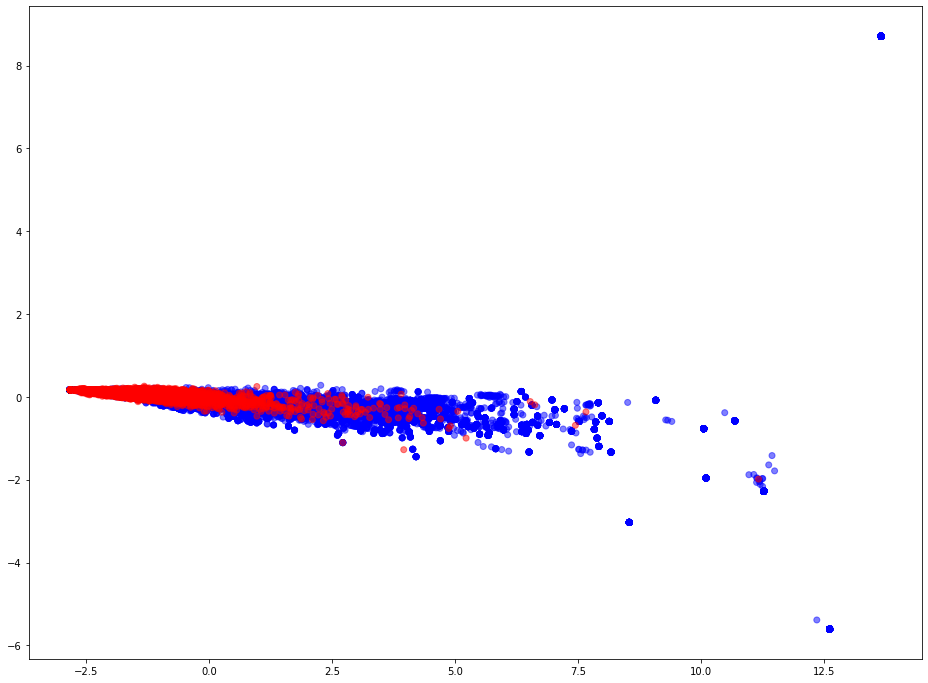

In [25]:
# Calculate edge features for test data
link_features = link_examples_to_features(
    examples_test, embedding_test, best_result["binary_operator"]
)

# Learn a projection from 128 dimensions to 2
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(link_features)

# plot the 2-dimensional points
plt.figure(figsize=(16, 12))
plt.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    c=np.where(labels_test == 1, "b", "r"),
    alpha=0.5,
)